# Messunsicherheiten beim Schwerependel

Folgende Formel ist gegeben:

$$T^2 = \frac{(2\pi)^2}{g}\cdot l$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Messung der Periodendauer aus der Vorlesung:

$$T = 1.1\,\mathrm s$$

In [2]:
T_messwert = 1.1 # in sekunde

## Schrecksekunde - Statistische Messunsicherheit

Erstelle ein Array oder ein DataFrame deiner persönlichen Messdaten um die Schrecksekunde zu ermitteln.

In [3]:
T_schrecksekunde = np.array([5.1, 4.9, 4.9, 5.0, 4.9]) # in sekunde
T_schrecksekunde_df = pd.DataFrame(T_schrecksekunde)
print(T_schrecksekunde_df)

     0
0  5.1
1  4.9
2  4.9
3  5.0
4  4.9


Berechne Standardabweichung dieser Messreihe um die Messunsicherheit einer Zeit-Einzelmessung zu erhalten. 

$$s = \sqrt{\frac{1}{m-1} \sum_{j=1}^m (x_j - \overline x)^2}$$

Achtung, bei der Standardabweichung musst du aufpassen ob das Programm die empirische (durch m-1 geteilt) oder die arithmetische (durch m geteilt) berechnet. Während die Funktion für dataframes bereits die gewünschte empirische berechnet, muss das für numpy arrays explizit über `ddof=1` mitangegeben werden (dof: degree of freedom). 

In [4]:
print('Standardabweichung (DataFrame)', T_schrecksekunde_df.std())
print('Standardabweichung (Numpy ohne ddof1)', T_schrecksekunde.std())
print('Standardabweichung (Numpy mit ddof1)', T_schrecksekunde.std(ddof=1))

u_T =T_schrecksekunde.std(ddof=1) # DataFrame 

Standardabweichung (DataFrame) 0    0.089443
dtype: float64
Standardabweichung (Numpy ohne ddof1) 0.07999999999999971
Standardabweichung (Numpy mit ddof1) 0.08944271909999127


In [5]:
print('Damit beträgt die Messunsicherheit deiner persönlichen Zeitmessung: ',u_T , 's' )

Damit beträgt die Messunsicherheit deiner persönlichen Zeitmessung:  0.08944271909999127 s


## Pendellänge

Der Messwert für die Pendellänge beträgt

$$l = (0.42 \pm 0.001) \,\mathrm{m}$$

Hierbei könnte ein größerer systematische Fehler entstanden sein als angenommen, da die Pendellänge bei dem Massependel nicht genau bestimmbar ist. Der Balken selber besitzt eine Masse und die Länge bis zum Massenschwerpunkt wurde nicht gemessen.

In [6]:
l_messwert = 42e-2 # in m
u_l = 1e-3 # in m

## Bestimmung der Erdbeschleunigung

Der Wert der Erdbeschleunigung für $g$ wird aus den besten Schätzwerten (= Mittelwerten) bestimmt:

$$g = \left(\frac{2\pi}{\overline T}\right)^2 \overline l$$

In [7]:
def g(T,l): # Definition der Funktion für g
    return (2*np.pi/T)**2 * l

g_messwert = g(T_messwert, l_messwert)
print('Die Schwerebeschleunigung ist', g_messwert, 'm/s^2')

Die Schwerebeschleunigung ist 13.703252391595138 m/s^2


Bestimmung der Messunsicherheit von $g$ erfolgt durch Fehlerfortpflanzung nach Gauß:

$$u_y = \sqrt{\left (\frac{\partial y}{\partial x_1} \cdot u_1 \right)^2 +\left (\frac{\partial y}{\partial x_2} \cdot u_2 \right)^2 +\cdots}$$

Das heißt für unseren Fall:

\begin{align}
u_g &= \sqrt{\left (\frac{\partial g}{\partial T} \cdot u_T \right)^2 +\left (\frac{\partial g}{\partial l} \cdot u_l \right)^2 }\\
&= \sqrt{ \left( -2 \cdot \frac{(2\pi)^2}{T^3} l \cdot u_T\right)^2 + \left(\frac{(2\pi)^2}{T^2}\cdot u_l \right)^2} \\
&= \sqrt{(-24,915\,\mathrm{m/s^3} \cdot 0{,}09\,\mathrm s)^2 + (32{,}627\,\mathrm{1/s^2} \cdot 10^{-3}\,\mathrm m)^2} \\
&= 1{,}329\,\mathrm{m/s^2}
\end{align}

In [8]:
import sympy as sym

T, l = sym.symbols('T l')
g_func = (2*np.pi/T)**2 * l

dg_dT = g_func.diff(T)
dg_dl = g_func.diff(l)


# Verwenden Sie lambdify auf den ursprünglichen Ausdruck g_func
f_dg_dT = sym.lambdify((T, l), dg_dT, modules=['numpy'])
f_dg_dl = sym.lambdify((T, l), dg_dl, modules=['numpy'])

result_dgdT = f_dg_dT(T_messwert, l_messwert)
print(result_dgdT)

result_dgdl = f_dg_dl(T_messwert, l_messwert)
print(result_dgdl)

-24.91500434835481
32.62679140855983


In [9]:
u_g = np.sqrt((result_dgdT * u_T)**2 + (result_dgdl * u_l)**2)
print('Die Messunsicherheit von g ist', u_g, 'm/s^2 (68%)')

Die Messunsicherheit von g ist 2.2287045656492688 m/s^2 (68%)


## Erweiterte Messunsicherheit nach Student-t-Verteilung

Korrigierte Messunsicherheit nach Student-t-Verteilung ist für die Periodendauer, d.h. 

$$s = m-1$$

$$p = 1-\alpha/2$$

für hier $\alpha = 1-0{,}99 = 0{,}01$ nach Aufgabenbeschreibung

In [10]:
s = len(T_schrecksekunde)-1
alpha = 0.01
p = 1-alpha/2
print('s-Quantil: ', s)
print('p-Quantil: ', p)

s-Quantil:  4
p-Quantil:  0.995


Aus Tabelle folgt für dies Werte (s = 4 und p = 0.995):

$$t_{s,p} = 4{,}604$$

Daraus folgt für die persönliche Schrecksekunden-Unsicherheit für den Vertrauensbereich 99%:

$$v_T = t_{s,p} \cdot 0{,}09\,\mathrm s = 4{,}604 \cdot 0{,}09\,\mathrm s = 0{,}411\,\mathrm s$$

Daraus wird der Fehler für $g$ neu berechnet:

In [11]:
t_sp = 4.6004
u_T =T_schrecksekunde.std(ddof=1) # DataFrame 
u_T = t_sp * u_T
print(u_T)

0.4114722849475998


Die Gauß'sche Fehlerfortpflanzung wird für den neuen Wert wiederholt:

In [12]:
u_g = np.sqrt((result_dgdT * u_T)**2 + (result_dgdl * u_l)**2)
print('Die Messunsicherheit von g ist', u_g, 'm/s^2 (99%)')
print('Das Messergebnis ist g = (', g_messwert, '+-', u_g, ')m/s^2 (99%)')

Die Messunsicherheit von g ist 10.251885686473123 m/s^2 (99%)
Das Messergebnis ist g = ( 13.703252391595138 +- 10.251885686473123 )m/s^2 (99%)


Die Messunsicherheit ist sehr groß. Das liegt unter anderem an der sehr geringen Anzahl von Messdaten für die Bestimmung der Schrecksekunde. 

## Pendellänge - Diagramm zeichnen

Das Massependel wurde durch ein Fadenpendel ausgetauscht und folgende Werte wurden während der Übung gemessen:

| $$l$$ (m) | $$T$$ (s) |
|-----------|-----------|
| 0.38      | 1.22      |
| 0.37      | 1.20      |
| 0.32      | 1.13      |
| 0.26      | 1.01      |

Die Unsicherheit von Periodendauer und Länge nehmen wir an mit $u_l = 0{,}5\,\mathrm{mm}$ und $u_T = 0{,}09\,\mathrm{mm}$.

In [13]:
l_data = np.array([38e-2, 37e-2, 32e-2, 26e-2])
u_l = 0.5e-3
u_l_data = np.array([u_l, u_l, u_l, u_l])
T_data = np.array([1.22, 1.2, 1.13, 1.01])
T_data = T_data
u_T = 0.09
u_T_data = np.array([u_T, u_T, u_T, u_T])

Wir wollen $T^2$ über $l$ plotten, das heißt wir müssen die Unsicherheit für $T^2$ bestimmen:

$$u_T^2 = 2 \cdot T \cdot u_T$$

In [14]:
u_T2_data = 2*T_data*u_T_data

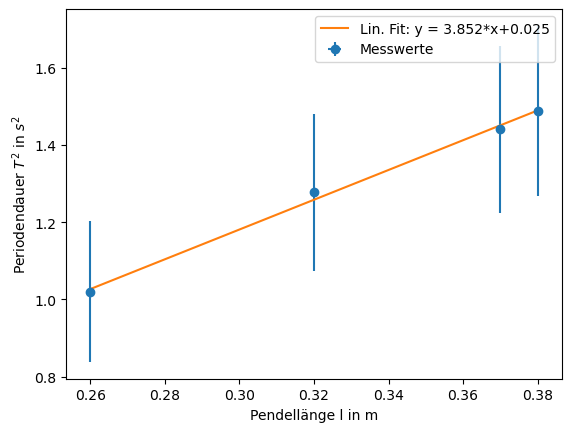

In [15]:
def fit_lin(x, b, a): # Funktion für lineare Regression
    return b*x + a

from scipy.optimize import curve_fit
# ----- Mit Fehlerbalken: ---- #

lin_fit = curve_fit(fit_lin, l_data, T_data**2, sigma=u_T2_data) # mit Fehlerbalken 
#lin_fit = curve_fit(fit_lin, l_data, T_data**2) # ohne Fehlerbalken


plt.errorbar(l_data,T_data**2, fmt='o', xerr = u_l_data, yerr = u_T2_data, label = 'Messwerte')
plt.plot(l_data,fit_lin(l_data, lin_fit[0][0], lin_fit[0][1]), label = 'Lin. Fit: y = %5.3f*x+%5.3f'%(lin_fit[0][0], lin_fit[0][1]))
plt.xlabel('Pendellänge l in m')
plt.ylabel(r'Periodendauer $T^2$ in $s^2$')

plt.legend()
plt.show()


Im Fit-Output werden folgende Parameter/Arrays gespeichert:

In [16]:
lin_fit

(array([3.85201285, 0.02545494]),
 array([[ 0.02652398, -0.0086251 ],
        [-0.0086251 ,  0.00286913]]))

Die erste Zeile sind die Fit-Parameter, hier Steigung $b$ und Y-Achsenabschnitt $a$ der Geradengleichung. Die zweite und dritte Reihe (= 1 Array) liefern die sogenannte Kovarianzmatrix, auf dessen Diagonale die quadrierten Standardabweichungen (die Varianz) von $b$ und $a$ stehen. Also auch hier bekommt man einen Fehler direkt berechnet. 

Der Fehler von $b$ ist also 

$$u_b = \sqrt{0{,}026}\,\mathrm{s^2/m} = 0{,}16\,\mathrm{s^2/m}$$

In [17]:
np.sqrt(lin_fit[1][0][0])

0.16286185269541348



Die Erdbeschleunigung wird aus der Steigung $b$ berechnet:

$$	T^2 = \frac{(2\pi)^2}{g}\cdot l$$

Das heißt für die Steigung:

$$b = \frac{(2\pi)^2}{g}$$

Umgestellt nach $g$:

$$g = \frac{(2\pi)^2}{b}$$

In [18]:
print('Die Erdbeschleunigung nach Steigung berechnet beträgt:')
print(4*np.pi**2/lin_fit[0][0],' m/s^2')

Die Erdbeschleunigung nach Steigung berechnet beträgt:
10.248776186048572  m/s^2


Für den Fehler gilt:

\begin{align}
u_g &= \sqrt{\left( \frac{\partial g}{\partial b} \cdot u_b\right)^2} = \sqrt{\left( \frac{-1\cdot 2 \pi}{b^2} \cdot u_b\right)^2} \\
& = \sqrt{\left( \frac{-1\cdot 2 \pi}{(3{,}852\,\mathrm{s^2/m})^2} \cdot 0{,}16\,\mathrm{s^2/m}\right)^2} = 0{,}069\,\mathrm{m/s^2}
\end{align}

In [19]:
2*np.pi / lin_fit[0][0]**2 * np.sqrt(lin_fit[1][0][0])

0.06896421291833496